# Ensembles: Bagging, Random Forests, Boosting.





In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.tree import export_graphviz
import os
import graphviz
import pydotplus

from IPython.display import Image



# Increase viewable area of Pandas tables, numpy arrays, plots
pd.set_option('max_rows', 15, 'max_columns', 500, 'max_colwidth', 1, 'precision', 2)
np.set_printoptions(linewidth=10000, precision=4, edgeitems=20, suppress=True)

In [3]:
def rmse(y_hat, y):
    return np.sqrt(mean_squared_error(y_hat, y))

In [4]:
sns.set()

In [5]:
plt.rcParams['figure.figsize'] = [16, 6]

# Loading data - [California Housing](https://scikit-learn.org/stable/datasets/index.html#california-housing-dataset)

Features:
* MedInc - median income in block
* HouseAge - median house age in block
* AveRooms - average number of rooms
* AveBedrms - average number of bedrooms
* Population - block population
* AveOccup - average house occupancy
* Latitude - house block latitude
* Longitude - house block longitude

Target: housing prices.

In [6]:
bunch = fetch_california_housing()

In [7]:
df = pd.DataFrame(bunch['data'], columns=bunch['feature_names'])
df['target'] = bunch['target']

In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
X = df.drop('target', axis=1)
Y = df['target']

# We will need a lot of different splits, so let's make a function
def get_train_test_split(X, Y, test_size=0.2, random_state=42):

    train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    assert test_X.shape[1] == train_X.shape[1]

    return train_X, test_X, train_Y, test_Y

train_X, test_X, train_Y, test_Y = get_train_test_split(X, Y, random_state=42)
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((16512, 8), (4128, 8), (16512,), (4128,))

# What's wrong with Decision trees?

It's said that Decision trees have **high variance**. Small changes in data can lead to radically different trees.

In [ ]:
def plot_tree(model, X, fname='temp_tree.png'):
    dot_data = export_graphviz(model, filled=True, rounded=True, feature_names=X.columns, out_file=None)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.write_png(fname)
    img = plt.imread(fname)
    plt.imshow(img)

RMSE 0.8015


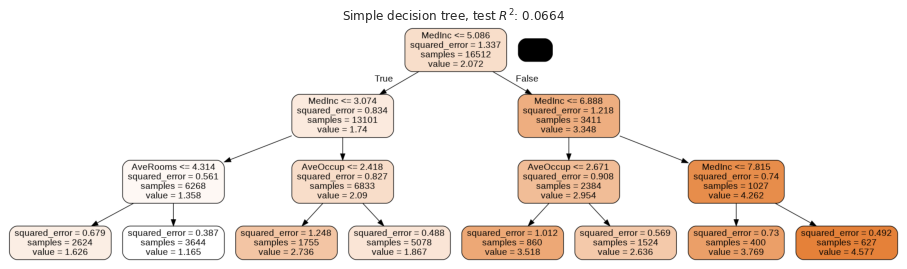

In [ ]:
# Random state affects the order at which predictors are considered. At each split the predictors are randomly permuted
tree1 = DecisionTreeRegressor(random_state=0, max_depth=3) 
tree1.fit(train_X, train_Y)
tree1_r2 = r2_score(tree1.predict(test_X), test_Y)
tree1_rmse = rmse(tree1.predict(test_X), test_Y)

print(f'RMSE {tree1_rmse:.4f}')
plot_tree(tree1, train_X)
plt.axis('off')
plt.title(f"Simple decision tree, test $R^2$: {tree1_r2:.4f}")
plt.show()

Let's test this claim. 
## Exercise: Create a different different data split and fit a tree to it. 
Plot the trees to check if they are visually different and the difference between test $R^2$ scores.
Use `max_depth=3` for both trees.

In [ ]:
# Your code here. Reuse the functions above.

### Solution:

In [ ]:
train_X_2, test_X_2, train_Y_2, test_Y_2 = get_train_test_split(X, Y, random_state=7)

tree2 = DecisionTreeRegressor(random_state=0, max_depth=3)
tree2.fit(train_X_2, train_Y_2)
tree2_r2 = r2_score(tree2.predict(test_X_2), test_Y_2)
tree2_rmse = rmse(tree2.predict(test_X_2), test_Y_2)
print(f'Test $R^2$ {tree2_r2:.4f}')
print(f'Test RMSE {tree2_rmse:.4f}')

Test $R^2$ 0.0920
Test RMSE 0.8105


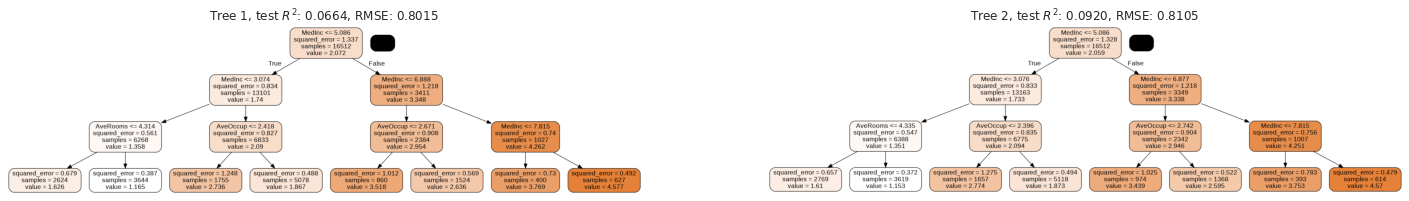

In [ ]:
plt.figure(figsize=(25, 15))
plt.subplot(1, 2, 1)
plot_tree(tree1, train_X)
plt.axis('off')
plt.title(f'Tree 1, test $R^2$: {tree1_r2:.4f}, RMSE: {tree1_rmse:.4f}')
plt.subplot(1, 2, 2)
plot_tree(tree2, train_X_2)
plt.axis('off')
plt.title(f'Tree 2, test $R^2$: {tree2_r2:.4f}, RMSE: {tree2_rmse:.4f}')
plt.show()

The dataset is the same and only 20% of data is selected into the test set, but trees are very different and achieve different results. 

It only gets worse if we use deeper trees.

# **B**ootstrap **Agg**regat**ed** Regression Trees

Instead of training just one tree, let's do the following:
1. Make $B$ bootstrap (sampling with replacement, remember?) samples from the training set.
2. Fit a decision tree (deep) to each, obtaining $B$ trees $f_1, f_2, \dots, f_B$
3. To predict, average the prediction of all trees: $\hat{y} = 1/B \sum_{i=0}^{B} f_i(x)$


In [ ]:
# Let's recreate a split with larger test size
train_X, test_X, train_Y, test_Y = get_train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# BaggingRegressor can be used with any model, not only decision trees

model = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_jobs=-1, n_estimators=100)
model.fit(train_X, train_Y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                 n_estimators=100, n_jobs=-1)

In [ ]:
print(f'Bagged trees $R^2$ score {r2_score(model.predict(test_X), test_Y):.4f}')
print(f'Bagged trees RMSE: {rmse(model.predict(test_X), test_Y):.4f}')

Bagged trees $R^2$ score 0.0838
Bagged trees RMSE: 0.7743


We can access individual trees.

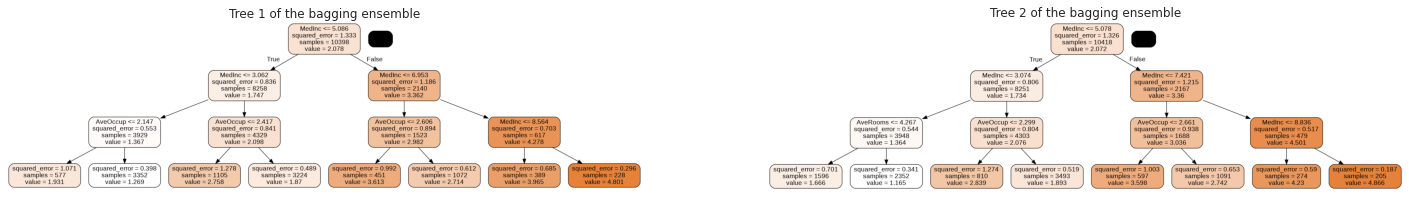

In [ ]:
tree1, tree2 = model.estimators_[0], model.estimators_[1]

plt.figure(figsize=(25, 15))
plt.subplot(1, 2, 1)
plot_tree(tree1, train_X)
plt.axis('off')
plt.title(f'Tree 1 of the bagging ensemble')
plt.subplot(1, 2, 2)
plot_tree(tree2, train_X)
plt.axis('off')
plt.title(f'Tree 2 of the bagging ensemble')
plt.show()

The training process of a Bagged ensemble allows us to estimate the test error **without using cross-validation**!

Each tree is trained on a sample of the training set.

For each observation $x_i$ we can make predictions using the trees for which $x_i$ was not in the training set. Then we can average the predictions and use them to compute the error. This will be a robust test error estimate.

In [ ]:
model = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=None), n_jobs=-1, n_estimators=20, oob_score=True)
model.fit(train_X, train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:1164: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "


BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=20,
                 n_jobs=-1, oob_score=True)

In [ ]:
print(f'Test score estimate using Out-of-bag score {model.oob_score_:.4f}')
print(f'Test score estimate using Cross-Validation {cross_val_score(model, train_X, train_Y, scoring="r2").mean():.4f}')
print(f'Actual test score: {r2_score(model.predict(test_X), test_Y):.4f}')

Test score estimate using Out-of-bag score 0.7800


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:1164: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:1164: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:1164: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:1164: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB sc

Test score estimate using Cross-Validation 0.7950
Actual test score: 0.7466


# Random Forests

Trees in Bagged ensembles tend to be *correlated*. They tend to be very similar. When you aggregate predictions of many similar trees, you don't reduce variance a lot.

How can we make trees less correlated?

The Random Forest solution: every time we consider a split, **sample $m$ features** out of the total $p$, such that $m < p$, and **make the best split using these $m$ features**.

In [ ]:
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth = 3, oob_score=True)
model.fit(train_X, train_Y)

RandomForestRegressor(max_depth=3, n_jobs=-1, oob_score=True)

In [ ]:
print(f'Test score estimate using Out-of-bag score {model.oob_score_:.4f}')
print(f'Actual test score: {r2_score(model.predict(test_X), test_Y):.4f}')

Test score estimate using Out-of-bag score 0.5590
Actual test score: 0.0796


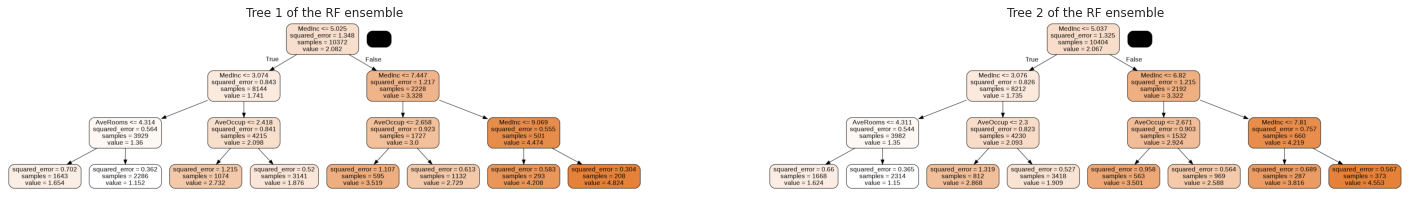

In [ ]:
tree1, tree2 = model.estimators_[0], model.estimators_[1]

plt.figure(figsize=(25, 15))
plt.subplot(1, 2, 1)
plot_tree(tree1, train_X)
plt.axis('off')
plt.title(f'Tree 1 of the RF ensemble')
plt.subplot(1, 2, 2)
plot_tree(tree2, train_X)
plt.axis('off')
plt.title(f'Tree 2 of the RF ensemble')
plt.show()

In [ ]:
# Now lets try realistic max_depth
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth = None, oob_score=True)
model.fit(train_X, train_Y)
print(f'Test score estimate using Out-of-bag score {model.oob_score_:.4f}')
print(f'Actual test score: {r2_score(model.predict(test_X), test_Y):.4f}')
print(f'Actual test RMSE: {rmse(model.predict(test_X), test_Y):.4f}')

Test score estimate using Out-of-bag score 0.8073
Actual test score: 0.7504
Actual test RMSE: 0.5047


## Feature importance

For each tree, we can compute the $RSS$ reduction caused by splitting on some feature. Then if we average this reductions over all trees, we obtain a measure of feature importance.

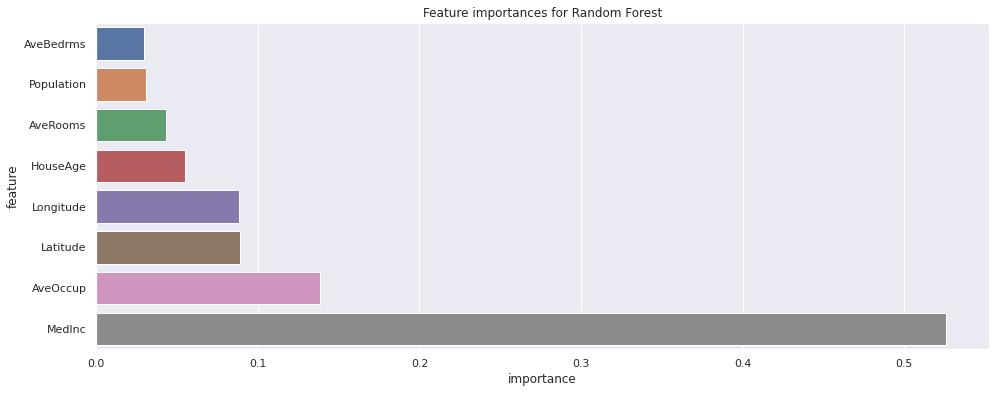

In [ ]:
feature_importances = zip(train_X.columns, model.feature_importances_)
feature_importances = sorted(feature_importances, key=lambda x: x[1])
feature_importances = pd.DataFrame(feature_importances, columns=['feature', 'importance'])

plt.title('Feature importances for Random Forest')
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.show()

## Tuning

The main things to tune for this model:
* `n_estimators` - number of trees,
* `max_samples` - number of samples in bootstrapped training set,
* `max_features` - number of features considered for a split,
* `max_depth` - max depth of trees.
Usually it's advised to keep it unlimited, but it can be beneficial to set a `max_depth` when you want to speed up the algorithm on large data or when the dataset contains a lot of noise.

The usual way is to select `n_estimators` and fix it, then tune the rest. The second most important is `max_features`, but you should tune it for some fixed `n_estimators`.

More info [here](https://dyakonov.org/2016/11/14/%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B9-%D0%BB%D0%B5%D1%81-random-forest/).

Fun fact. apart from regression and classification RF can also be used for:
* Clustering
* Anomaly detection
* Dimensionality reduction
* Feature selection
And possibly more!

# Gradient boosted trees

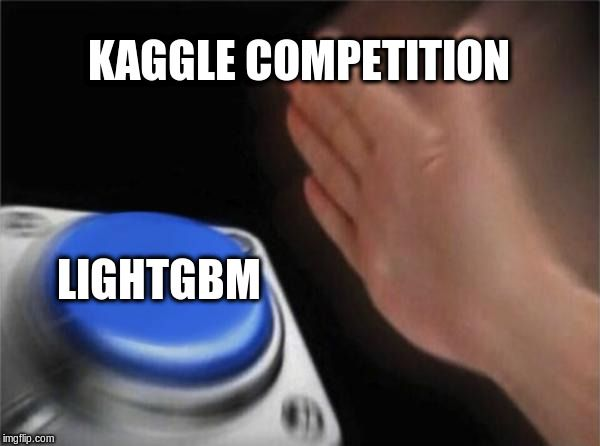


Gradient Boosted trees is an ensemble model where each subsequent tree corrects the errors of the model. This is done by fitting trees to the residuals of the model. 

In this setting the trees have **small height** $d$ (3-8 splits usually).

We want each tree to correct just a bit of the errors, so we introduce a learning rate hyperparameter $\lambda$. Each tree's predictions are multipled by it, so it should be $\lambda < 1$. Usual values include $0.01$ and lower.

The total number of trees is also a hyperparameter $B$.

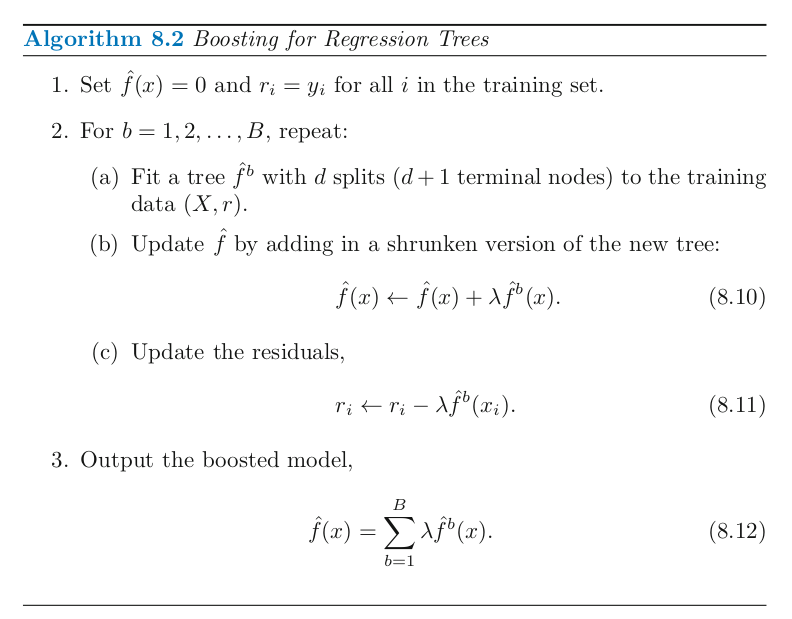

Source: ISLR, page 323.

Cool stuff about Boosting: in regression the residuals are actually the negative gradients of MSE. This means that the algorithm of boosting can be specialized to a gradient descent algorithm, allowing us to optimize any loss function that can be optimized via GD.

In [ ]:
model = GradientBoostingRegressor(n_estimators=100)
model.fit(train_X, train_Y)

GradientBoostingRegressor()

In [ ]:
print(f'Test R^2 score: {r2_score(model.predict(test_X), test_Y):.4f}')
print(f'Test RMSE: {rmse(model.predict(test_X), test_Y):.4f}')

Test R^2 score: 0.7000
Test RMSE: 0.5423


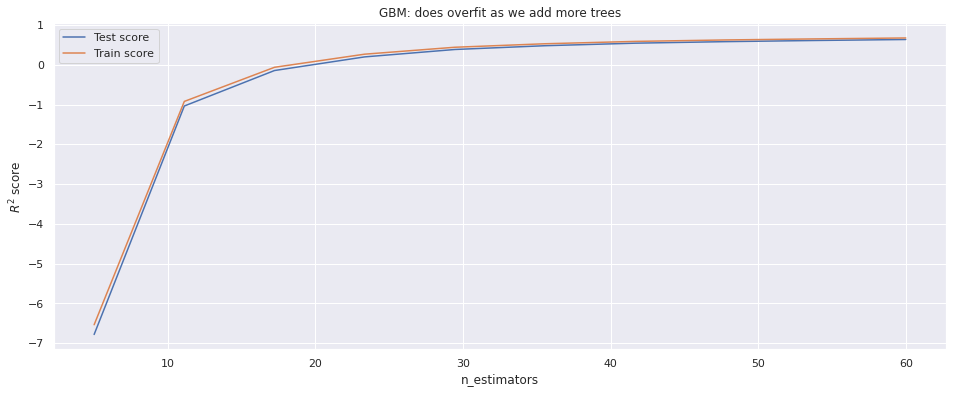

In [ ]:
n_estimator_values = np.linspace(5, 60, 10)

train_scores = []
test_scores = []
for n_estimators in n_estimator_values:
     model = GradientBoostingRegressor(n_estimators=int(n_estimators))
     model.fit(train_X, train_Y)
     
     train_score = r2_score(model.predict(train_X), train_Y)
     test_score = r2_score(model.predict(test_X), test_Y)

     test_scores.append(test_score)
     train_scores.append(train_score)

plt.figure()
plt.plot(n_estimator_values, test_scores, label='Test score')
plt.plot(n_estimator_values, train_scores, label='Train score')
plt.xlabel('n_estimators')
plt.ylabel('$R^2$ score')
plt.legend()
plt.title('GBM: does overfit as we add more trees')
plt.show()

In practice, you want to use one of these implementations:


*   https://lightgbm.readthedocs.io/en/latest/ - my personal favourite.
*   https://xgboost.readthedocs.io/en/latest/ - somewhat old now, but popular.
*   https://catboost.ai/ - made by Yandex (yay patriotism) and said to work better with categorical features.

These provide:

*   Additions to the original Gradient Boosting to speed up convergence and combat overfitting:
 * Stochastic Gradient boosting: making splits on subsamples of features and/or rows,
 * Optimizations to find the best split faster (e.g. [approximate search using quantiles in XGBoost](https://towardsdatascience.com/why-xgboost-is-so-effective-3a193951e289)).
* Very efficient implementations - fast!
* Parallelization and computation on GPUs.
* Helpers to tuning params, CV and more.




In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor # sklearn-like API, but it's not the only one available
import lightgbm as lgb

In [ ]:
model = LGBMRegressor()
model.fit(train_X, train_Y)
print(f'Test R^2 score: {r2_score(model.predict(test_X), test_Y):.5f}')

Test R^2 score: 0.80139


Better than everything before, and thats before any tuning at all.

We can also use the non-sklearn API that's way more efficient:

In [ ]:
train_data = lgb.Dataset(train_X, free_raw_data=False, label=train_Y, feature_name=train_X.columns.tolist())

In [ ]:
params = {
    'n_jobs': -1,
    'learning_rate': 0.2,
}

In [ ]:
num_round = 100
bst = lgb.train(params, train_data, num_round)

In [ ]:
print(f'Test R^2 score: {r2_score(bst.predict(test_X), test_Y):.5f}')

Test R^2 score: 0.81119


## Tuning

`learning_rate` is the multiplier for each subsequent tree. 

`n_estimators` aka `num_iterations`.

`early_stopping_round` - stop training if score does not improve on a validation set for this many iterations.

In general you should first fix `n_estimators` to some value and then optimize other parameters.

`n_estimators` and `learning_rate` are very tightly related!

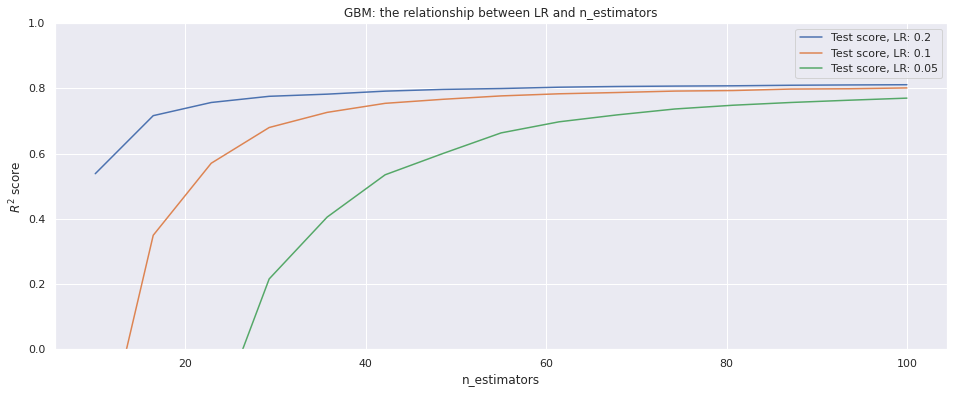

In [ ]:
n_estimator_values = np.linspace(10, 100, 15)
learning_rate_values = [0.2, 0.1, 0.05]

test_scores = {}
for learning_rate in learning_rate_values:
    for n_estimators in n_estimator_values:
        model =  LGBMRegressor(n_estimators=int(n_estimators), learning_rate=learning_rate, n_jobs=-1)
        model.fit(train_X, train_Y)
        
        test_score = r2_score(model.predict(test_X), test_Y)
        if not test_scores.get(learning_rate):
            test_scores[learning_rate] = []
        test_scores[learning_rate].append(test_score)

plt.figure()
for learning_rate in learning_rate_values:
    plt.plot(n_estimator_values, test_scores[learning_rate], label=f'Test score, LR: {learning_rate}')
plt.xlabel('n_estimators')
plt.ylabel('$R^2$ score')
plt.legend()
plt.title('GBM: the relationship between LR and n_estimators')
plt.ylim(0, 1)
plt.show()


A lot more info [here](https://dyakonov.org/2017/06/09/%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9-%D0%B1%D1%83%D1%81%D1%82%D0%B8%D0%BD%D0%B3/).

Important hack: boosting predictions can be out of bounds of training range!

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


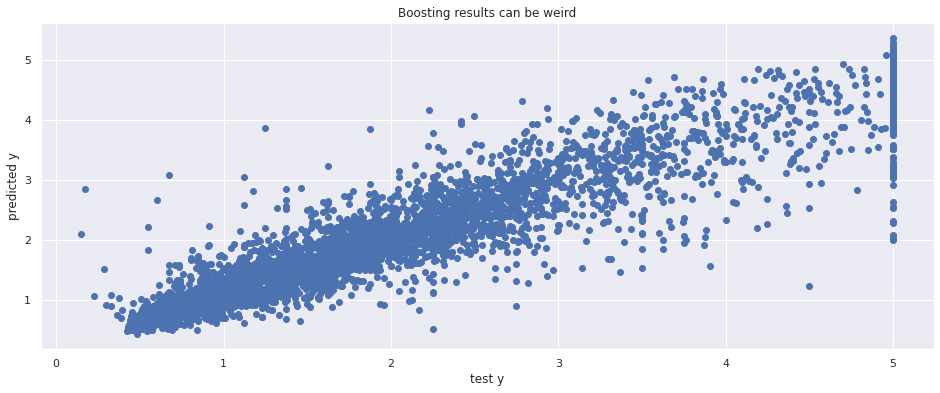

In [ ]:
model = LGBMRegressor(n_jobs=-1, learning_rate=0.1, num_round=100)
model.fit(train_X, train_Y)

predictions = model.predict(test_X)

plt.figure()
plt.title('Boosting results can be weird')
plt.scatter(test_Y, predictions)
plt.xlabel('test y')
plt.ylabel('predicted y')
plt.show()

In [ ]:
predictions[predictions > 5][:10]

array([5.071 , 5.0953, 5.1592, 5.1316, 5.0637, 5.1838, 5.0228, 5.1637, 5.1074, 5.0693])

In [ ]:
np.clip(predictions, 0, 5)[predictions > 5][:10]

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

In [ ]:
print(f'RMSE: {rmse(predictions, test_Y):.4f}')
print(f'RMSE after clipping: {rmse(np.clip(predictions, 0, 5), test_Y):.4f}')

print(f'R^2: {r2_score(predictions, test_Y):.4f}')
print(f'R^2 after clipping: {r2_score(np.clip(predictions, 0, 5), test_Y):.4f}')

RMSE: 0.4635
RMSE after clipping: 0.4633
R^2: 0.8014
R^2 after clipping: 0.8002


## Feature importance

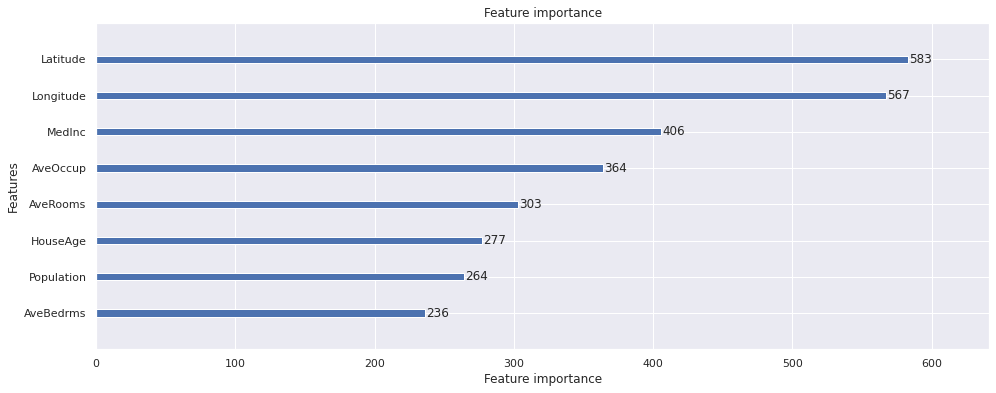

In [ ]:
lgb.plot_importance(bst)

## Final exercise: Tuning GBM

Tune the parameters for LightGBM. You should be able to achieve 0.9+ R^2 on this dataset,

[Read here how to tune them](https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html)

**First step:** create a validation set and try setting `early_stopping_round`, [see here for instructions](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html#early-stopping). 

**What to try next:** identify if you have overfitting issues (use plots) and if you do try some [regularization techniques](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regularization.html)

In [ ]:
# Your code here!

validation_data = lgb.Dataset()# Create validation set here
train_data = lgb.Dataset()

params = {
    'n_jobs': -1,
    'learning_rate': 0.2,
    #'early_stopping_round': None, # Set to some value
}

num_round = 1000
model = lgb.train(params, train_data,  num_round, valid_sets=[validation_data])

In [ ]:
predictions = model.predict(test_X)

In [ ]:
print(f'Test R^2 score: {r2_score(predictions, test_Y):.4f}')
print(f'Test RMSE: {rmse(predictions, test_Y):.4f}')